In [1]:
#Setting up
%pip -q install pycaret skimpy numpy pydotplus graphviz

Note: you may need to restart the kernel to use updated packages.


╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 200    │ │ int32       │ 4     │                                                          │
│ │ Number of columns │ 5      │ │ string      │ 1     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name              ┃ NA  ┃ NA %  ┃ mean   ┃ sd     ┃ p0  ┃ p25    ┃ p50    ┃ p75    ┃ p100  ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━┩  │
│ │ CustomerID               │   0 │     0 │  100.5 │  57.88 │   1 │  50.75 │  100.5 │  150.2 │   200 │ ▇▇▇▇▇▇ │  │
│ │ Age                      │   0 │     0 │  38.85 │  13.97 │  18 │  28.75 │     36 │     49 │    70 │ ▆▇▅▅▃▂ │  │
│ │ Annual Income (k$)       │   0 │     0 │  60.56 │  26.26 │  15 │   41.5 │   61.5 │     78 │   137 │ ▅▇▇▅▂▁ │  │
│ │ Spending Score (1-100)   │   0 │     0 │   50.2 │  25.82 │   1 │  34.75 │     50 │     73 │    99 │ ▅▃▇▇▅▅ │  │
│ └──────────────────────────┴─────┴───────┴────────┴────────┴─────┴────────┴────────┴────────┴───────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ Gender                    │       0 │          0 │                            1 │                      200 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

array([[<Axes: title={'center': 'CustomerID'}>,
        <Axes: title={'center': 'Age'}>],
       [<Axes: title={'center': 'Annual Income (k$)'}>,
        <Axes: title={'center': 'Spending Score (1-100)'}>]], dtype=object)

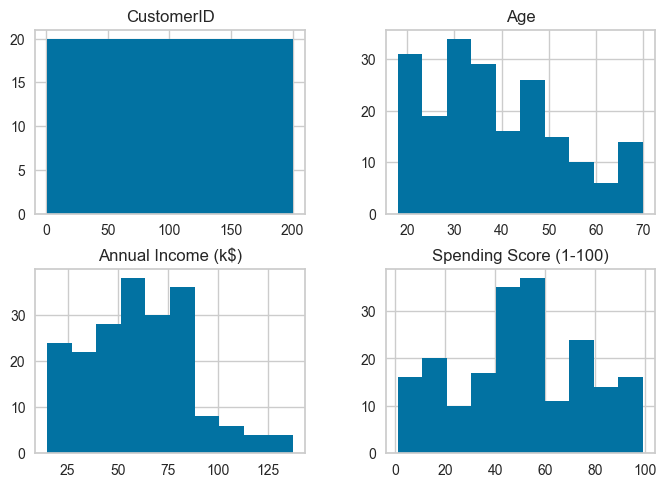

In [65]:
# preparing
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import skimpy as sk 
from sklearn.tree import DecisionTreeClassifier, export_graphviz, plot_tree
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, MinMaxScaler, OrdinalEncoder, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, train_test_split 
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, precision_score, recall_score, f1_score, roc_auc_score, mean_absolute_error, mean_squared_error, r2_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.feature_selection import SelectKBest,chi2
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer
from pycaret.classification import *
from sklearn.cluster import KMeans, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, cophenet, linkage
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.spatial.distance import pdist

# Load data
df = pd.read_csv('data/Mall_Customers_final.csv')


sk.skim(df)
df.hist()

In [66]:
# Check for missing values
print(df.info())
df.T.apply(lambda x: x.unique(), axis=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None


CustomerID                [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
Gender                                                       [Male, Female]
Age                       [19, 21, 20, 23, 31, 22, 35, 64, 30, 67, 58, 2...
Annual Income (k$)        [15, 16, 17, 18, 19, 20, 21, 23, 24, 25, 28, 2...
Spending Score (1-100)    [39, 81, 6, 77, 40, 76, 94, 3, 72, 14, 99, 15,...
dtype: object

In [67]:
df.head(5)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [68]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [69]:
df[df.duplicated()]

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)


In [70]:
# Define the boundaries for your spending score groups
low_spending_threshold = 30
medium_spending_threshold = 70

# Create a new column 'Group' and assign labels based on spending score
df['Group'] = 'Low Spending'
df.loc[(df['Spending Score (1-100)'] > low_spending_threshold) & (df['Spending Score (1-100)'] <= medium_spending_threshold), 'Group'] = 'Medium Spending'
df.loc[df['Spending Score (1-100)'] > medium_spending_threshold, 'Group'] = 'High Spending'

# Print the DataFrame with the added 'Group' column
print(df)

     CustomerID  Gender  Age  Annual Income (k$)  Spending Score (1-100)  \
0             1    Male   19                  15                      39   
1             2    Male   21                  15                      81   
2             3  Female   20                  16                       6   
3             4  Female   23                  16                      77   
4             5  Female   31                  17                      40   
..          ...     ...  ...                 ...                     ...   
195         196  Female   35                 120                      79   
196         197  Female   45                 126                      28   
197         198    Male   32                 126                      74   
198         199    Male   32                 137                      18   
199         200    Male   30                 137                      83   

               Group  
0    Medium Spending  
1      High Spending  
2       Low Spendi

In [71]:
# Calculate Z-scores for each numeric column
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
z_scores = df[numeric_cols].apply(lambda x: np.abs(x - x.mean()) / x.std())
# Detect outliers
outliers = z_scores[z_scores > 3].index

# Print outliers
print("Outliers:", outliers)

Outliers: RangeIndex(start=0, stop=200, step=1)


In [72]:
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])
ordi = OrdinalEncoder()
df['Group'] = le.fit_transform(df['Group'])
             
df_clustering = df[['Age', 'Annual Income (k$)', 'Group']]

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)
df_clustering.head()

,Age,Annual Income (k$),Group
0,19,15,2
1,21,15,0
2,20,16,1
3,23,16,0
4,31,17,2


<Axes: title={'center': 'Heatmap showing Correlation between all the features'}>

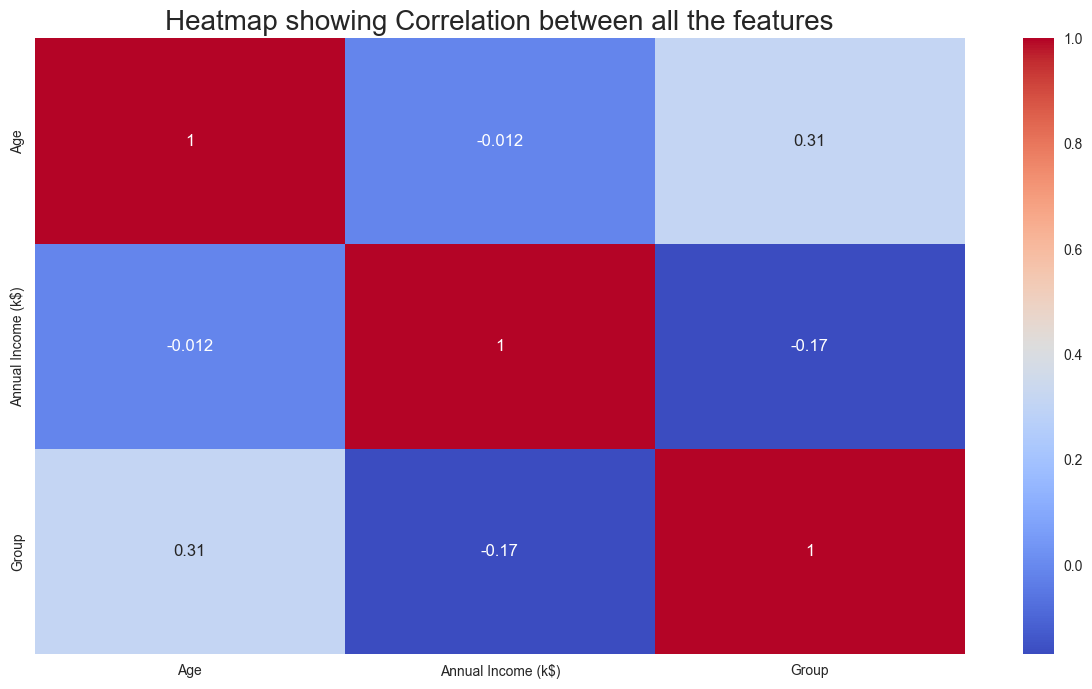

In [73]:
plt.figure(figsize=(15,8))
plt.title("Heatmap showing Correlation between all the features", fontsize=20)
sns.heatmap(df_clustering.corr(),annot = True, cmap='coolwarm')

In [74]:
# Create a list to store WCSS values
wcss = []

# Iterate over different K values
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(df_clustering)
    wcss.append(kmeans.inertia_)

# Print the calculated WCSS values
print(wcss)

[176252.20000000004, 87304.8341384863, 59637.267529292876, 39616.1458411403, 32882.0242063492, 25809.44843903828, 22598.800158087524, 19693.006275174102, 17796.492848646925, 14969.125289123118, 12954.321123308422, 11392.479943727769, 10409.40399843768, 9485.942108877964, 8983.21726999136, 8754.989980614071, 8143.2763362981095, 7387.558973956152, 6856.225640622819, 5940.253977664848]


In [87]:
# Apply PCA to reduce dimensionality
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df_scaled)

# Manual config
kmeans = KMeans(n_clusters=3,
                init='random',  # Initialization method
                n_init=10,  # Number of times the algorithm is run
                max_iter=800,  # Maximum number of iterations
                tol=1e-12,  # Tolerance for convergence
                algorithm='lloyd')  # Algorithm used for the Lloyd's method
kmeans.fit(df_pca)

# Calculate the linkage matrix
Z = linkage(df_pca, 'ward')

# Calculate the silhouette score and calinski_harabasz score
silhouette = silhouette_score(df_pca, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(df_pca, kmeans.labels_)
c, coph_dists = cophenet(Z, pdist(df_pca))

print(f"calinski_harabasz score: {calinski_harabasz:.3f}")
print(f"Silhouette score: {silhouette:.3f}")
print(f"Cophenetic Correlation Coefficient: {c:.3f}")

calinski_harabasz score: 209.649
Silhouette score: 0.456
Cophenetic Correlation Coefficient: 0.668


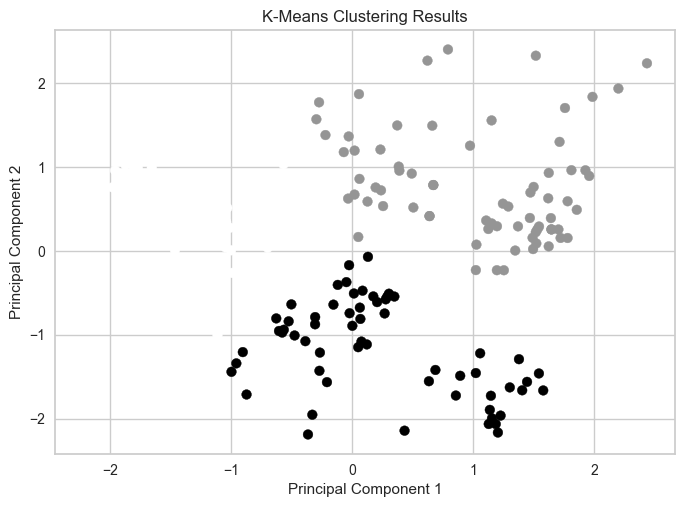

In [89]:
#K-Means Clustering Results
# Get the cluster labels
labels = kmeans.labels_

# Create a scatter plot of the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels)
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.show()

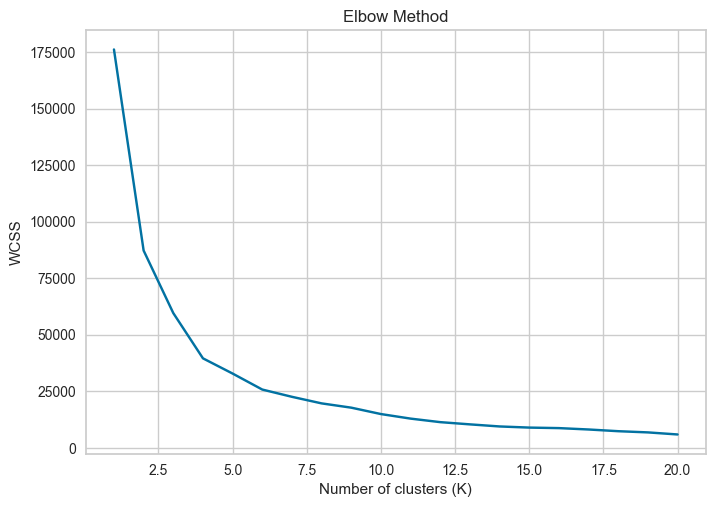

In [90]:
if not wcss:
    print("Error: WCSS list is empty. Please calculate WCSS values first.")
    exit()

plt.plot(range(1, 21), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters (K)')
plt.ylabel('WCSS')
plt.show()

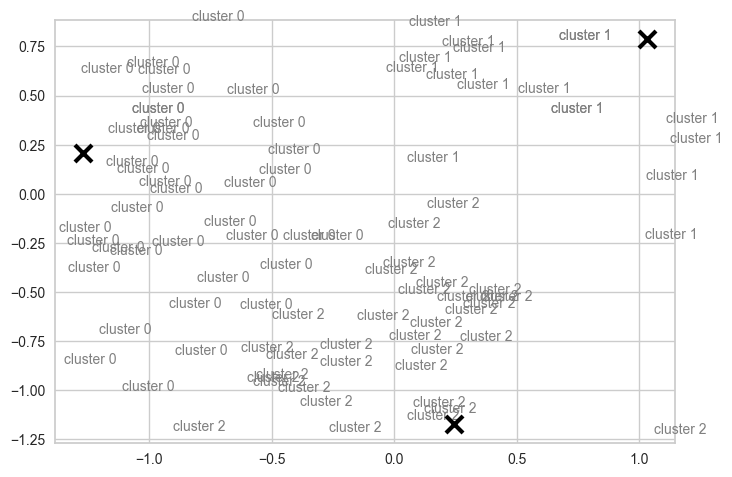

Text(0, 0.5, 'Principal Component 2')

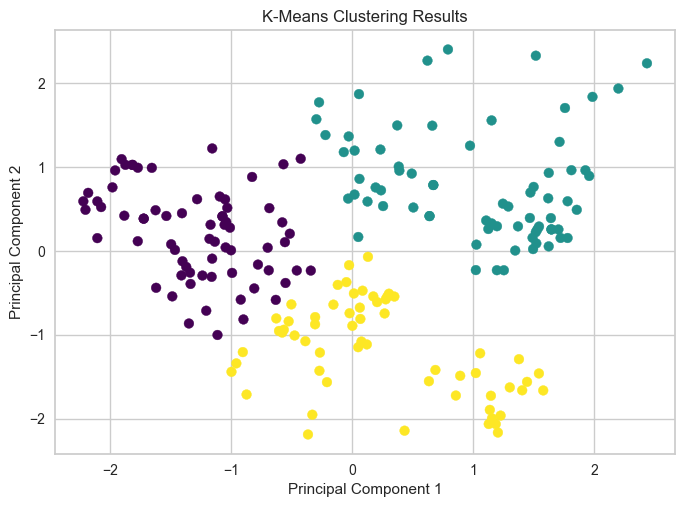

In [92]:
# Display the centroids
centroids = kmeans.cluster_centers_
plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=150, linewidths=3, color='black', zorder=10)

# Display the cluster labels
for i in range(len(df_pca)):
    plt.annotate(f'cluster {labels[i]}', (df_pca[i, 0], df_pca[i, 1]), fontsize=10, color='grey')
plt.show()

# Create a scatter plot of the clusters
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=labels, cmap='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

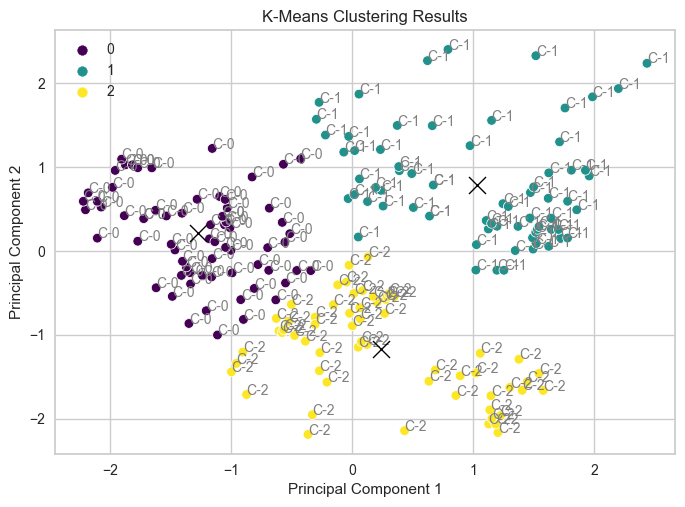

In [93]:
sns.scatterplot(x=df_pca[:, 0], y=df_pca[:, 1], hue=labels, palette='viridis')
plt.title('K-Means Clustering Results')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')

sns.scatterplot(x=centroids[:, 0], y=centroids[:, 1], marker='x', s=150, linewidths=3, color='black', zorder=10)

for i in range(len(df_pca)):
    plt.annotate(f'C-{labels[i]}', (df_pca[i, 0], df_pca[i, 1]), fontsize=10, color='grey')

plt.show()